f(x,y) = (1.5 – x -xy)^2 + (2.25 – x + xy^2)^2 + (2.625 – x + xy^3)^2 for x,y in range <-4.5, 4.5>


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [39]:
from sys import maxsize


def f(x):
    """for x,y in range <-4.5,4.5>"""
    
    
    up_domain = 4.5              # representation of function domain
    low_domain = -4.5
    
    # if ((x[0]<low_domain) | x[1] > up_domain):
    #     return np.float64(maxsize)

    # # else:
    return (1.5 - x[0] - x[0] * x[1])**2 + (2.25 - x[0] + (x[0] * x[1])**2)**2 + (2.625 - x[0] + (x[0] * x[1])**3)**2



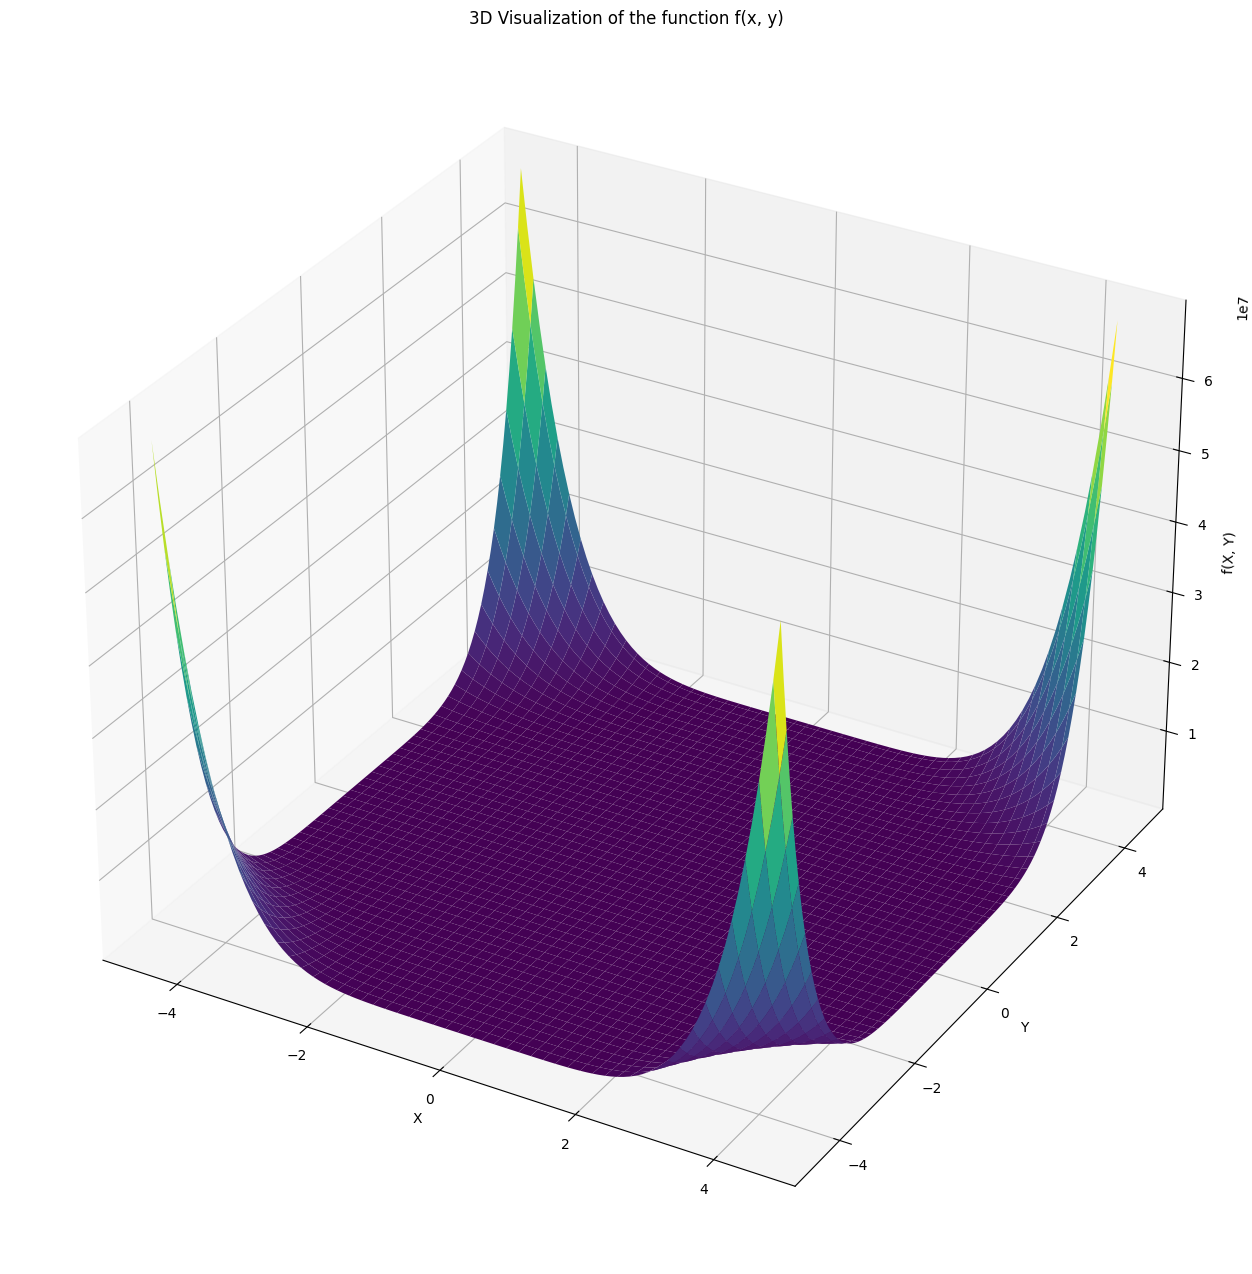

In [40]:
# Define the range for x and y values
x = np.linspace(-4.5, 4.5, 100)
y = np.linspace(-4.5, 4.5, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))
# Plotting the 3D surface
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

In [41]:
X

array([[-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ],
       [-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ],
       [-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ],
       ...,
       [-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ],
       [-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ],
       [-4.5       , -4.40909091, -4.31818182, ...,  4.31818182,
         4.40909091,  4.5       ]])

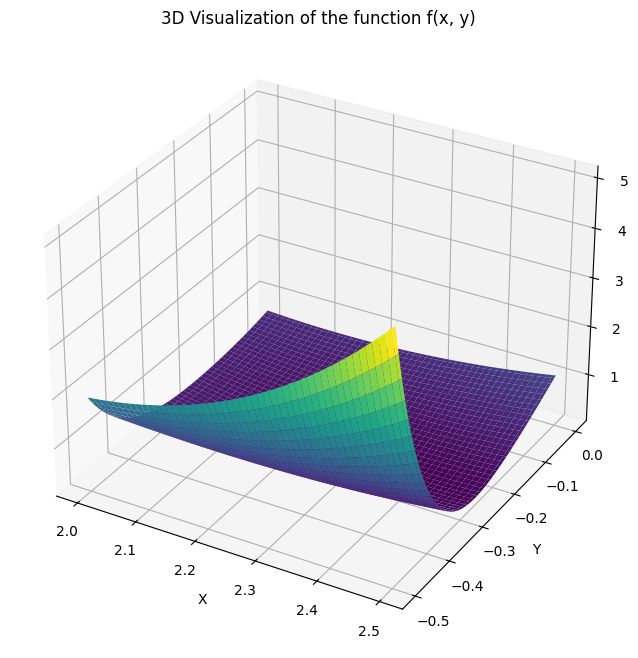

In [42]:
# Define the range for x and y values
x = np.linspace(2, 2.5, 100)
y = np.linspace(-0.5, 0, 100)
X, Y = np.meshgrid(x, y)

Z = f((X,Y))

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('3D Visualization of the function f(x, y)')

plt.show()

Value of the function explodes especially on the ends of range <-4.5,4.5>

In [43]:
particles = 200
dim = 2
c = 2.05  # as in original paper
steps =20
up_domain = 4.5              # representation of function domain
low_domain = -4.5

Pack to function 

In [56]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = chi*(v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)]))  # I'm just impressed how this chi stabilize this algo
        X = X + V    
        
        # additional if to make sure that we don't assign to minimum point from outside of search space, with this implementation the most simple way to do that is in function
        
       
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        # p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # if x in X is out of the domain than set which_lower to 1 
        
        for i in range(len(X)):
            if ((X[i][0]<low_domain)|(X[i][1]>up_domain)):
                which_lower[i] = 1
        
        
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        # now calcualte global minimum
        global_mn = np.apply_along_axis(function,axis=1,arr=P)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        p_g = global_mn.argmin() 
        
        print(f"Step: {_} best value: {P_I.min()} , this step min: {F_P.min()}")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()
    

In [73]:
pso_optimizer(function=f,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 best value: 0.36956696085944807 , this step min: 0.36956696085944807
Step: 1 best value: 0.16128003341913863 , this step min: 0.16128003341913863
Step: 2 best value: 0.16128003341913863 , this step min: 3.2468125392664664
Step: 3 best value: 0.16128003341913863 , this step min: 0.6319382803862934
Step: 4 best value: 0.16128003341913863 , this step min: 0.3151288130724844
Step: 5 best value: 0.16128003341913863 , this step min: 0.22542595377336283
Step: 6 best value: 0.13506060243011883 , this step min: 0.13506060243011883
Step: 7 best value: 0.13506060243011883 , this step min: 0.15406465039659017
Step: 8 best value: 0.13506060243011883 , this step min: 0.14592580354195886
Step: 9 best value: 0.13506060243011883 , this step min: 0.14369541936583535
Step: 10 best value: 0.13236197600451563 , this step min: 0.13236197600451563
Step: 11 best value: 0.13236197600451563 , this step min: 0.13878554679761115
Step: 12 best value: 0.13236197600451563 , this step min: 0.1326295256208466


(array([ 2.37452449, -0.25610599]), 0.1317910511684601)

In [ ]:
(array([ 2.37140071, -0.25674581]), 0.13186050735053845)


Verification against a simple example 

In [46]:
def f_test(x):
    """for x,y in range <-2,2>"""
    return x[0]**2 + x[1]**2
low_domain = -2
up_domain = 2


In [47]:
pso_optimizer(function=f_test,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)

Step: 0 best value: 0.0005681028293383708 , this step min: 0.0005681028293383708
Step: 1 best value: 0.0005681028293383708 , this step min: 0.021313595212924863
Step: 2 best value: 0.00048239439320781015 , this step min: 0.00048239439320781015
Step: 3 best value: 0.00048239439320781015 , this step min: 0.02215015963646609
Step: 4 best value: 0.00019673619244301528 , this step min: 0.00019673619244301528
Step: 5 best value: 0.00019673619244301528 , this step min: 0.014507505441643935
Step: 6 best value: 0.00019673619244301528 , this step min: 0.00045237325264873765
Step: 7 best value: 0.00019673619244301528 , this step min: 0.004181904208237682
Step: 8 best value: 0.0001430708066318959 , this step min: 0.0001430708066318959
Step: 9 best value: 0.0001430708066318959 , this step min: 0.0005983361323826368
Step: 10 best value: 0.0001430708066318959 , this step min: 0.00033579273050490316
Step: 11 best value: 0.0001430708066318959 , this step min: 0.0010092157712994114
Step: 12 best value: 

(array([-0.00489582, -0.0056508 ]), 5.5900605862145165e-05)

In [48]:
# Defining a Standard for Particle Swarm Optimization Daniel Bratton James Kennedy 2007 
def pso_optimizer_withmistake(function = f , particles = 50 , steps = 20 , c = 2.05 , chi = 0.72984, low_domain = low_domain, up_domain = up_domain , dim = 2):
    X  = np.random.uniform(low = low_domain , high= up_domain , size=(particles,dim))  # initialize positions of each particle in search space
    P = X.copy()   # for now it's just init postion
    V = np.random.random(size = (particles,dim))                    # let's just init as rand from range (0,1)
    # I should have access to both value and args
    F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

    P_I = F_P      # at first step it's just that in next we need to compare

    p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 

    epsilon = np.random.random(size=(dim,2))
    
    for _ in range(steps):
        # update V  as ub Bratton, D., & Kennedy, J. (2007). Defining a Standard for Particle Swarm Optimization. 2007 IEEE Swarm Intelligence Symposium. doi:10.1109/sis.2007.368035 
        iterator = np.nditer(V,flags=['multi_index'])    
        for v in iterator:
            i = iterator.multi_index[0]   # as I'm used to in matrix 
            j = iterator.multi_index[1]
            V[(i,j)] = v + c * (P[(i,j)]- X[(i,j)]) * epsilon[j][0] + c * epsilon[j][1] * (P[p_g][j] - X[(i,j)])  # I'm just impressed how this chi stabilize this algo, here example of lacking this
            # here according to papers I have a small mistake because without this constant I should cap V to some level and I ommit this on puprose
        X = X + V    
                
        F_P = np.apply_along_axis(function,axis=1,arr=X)  # calcualte funciton value for every x1, x2 at this step and compare with previous 

        P_I = np.minimum(F_P, P_I)     # at first step it's just that in next we need to compare  # if P_I < F_P swap 

        p_g = P_I.argmin()        # at first step it's just that cuz we can't compare with anything 
        values = np.column_stack((F_P,P_I))   # 1 column old best, 0 new values 
        which_lower = values.argmin(axis=1)
        # update table of arguments 

        for i in range(len(which_lower)):
            if which_lower[i] == 0:   # if new is better replace arguments 
                P[i] = X[i]    # otherwise not 
        epsilon = np.random.random(size=(dim,2))
        
        print(f"Step: {_} best value: {P_I.min()} , this step min: {F_P.min()}")
    
    # return arguments, min 
    return  P[p_g] , P_I.min()

In [49]:
pso_optimizer_withmistake(function=f,particles=particles,steps=steps,c=c,low_domain=low_domain,up_domain=up_domain,dim=dim)  # it found minimum but it's not stable

Step: 0 best value: 0.2692998696103507 , this step min: 0.2692998696103507
Step: 1 best value: 0.2692998696103507 , this step min: 1.766484357377034
Step: 2 best value: 0.25902042986912266 , this step min: 0.25902042986912266
Step: 3 best value: 0.1898172424220705 , this step min: 0.1898172424220705
Step: 4 best value: 0.14450095329009502 , this step min: 0.14450095329009502
Step: 5 best value: 0.14450095329009502 , this step min: 0.20981657184124133
Step: 6 best value: 0.14450095329009502 , this step min: 1.0932892634409173
Step: 7 best value: 0.14450095329009502 , this step min: 0.47941028206817193
Step: 8 best value: 0.14450095329009502 , this step min: 0.4612102468859275
Step: 9 best value: 0.14066097317749923 , this step min: 0.14066097317749923
Step: 10 best value: 0.14066097317749923 , this step min: 1.240331361843686
Step: 11 best value: 0.14066097317749923 , this step min: 10.163214305402459
Step: 12 best value: 0.14066097317749923 , this step min: 0.6688461122110583
Step: 13 

(array([ 2.32070965, -0.2609287 ]), 0.14066097317749923)